# Project: Analysing a Medical Appointment Dataset

Table of Contents
 1. Introduction
 2. Data Wrangling
 3. Exploratory Data Analysis
 4. Conclusion

# Introduction
This dataset contains information on over hundred thousand medical appointments from Brazil. This dataset was collected from Kaggle and was created to study what factors would be useful in predicting if patients would miss their medical appointments or not. The dataset contains different information about the patients and some of them include their gender, age, neighbourhood, whether or not they rceived SMS notifications, it also shows whether or not the patient is enrolled in Brasilian welfare program (scholarship).

# Research Questions: 
1. How many patients showed up for their medical appointments?
2. Does age determine whether or not patients show up for their medical appointments?
3. Is there any relationship between the gender distribution of the patients and their show ups to medical appointments? 
4. Do Scholarship recipients show up more for their medical appointments?
5. Do patients who receive SMS notifications show up more for their appointments?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Wrangling

# General Properties
The Pandas library will be used to display basic information about the dataset. 

In [2]:
df = pd.read_csv('Medical_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The above ouput shows that there are 110,527 entries with 14 columns, and there are no null fields. Columns like PatientID and AppointmentID 

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This describe function provides a summary statistics of the dataset, showing the binary fields to include hipertension, diabetes, alcholism and SMS_received, while the Handcap field has a maximum value of 4.While it is not immediately clear from the dataset why this is so, discussions on the Kaggle forum revelaled that Handcap represents the total number of handicaps a patient has.

# Data Cleaning

The general properties of the dataset showed that there are no missing data, however, the describe function indicated that the age entry had outliers which could be errors. The youngest person is -1 and the oldest is 115. Typically ages are no reperesented in the negatives, and boxplots can be used to provide a visual representation of outliers, as they graphically show the interquartile ranges of the data with the outliers represented putside the plot.  

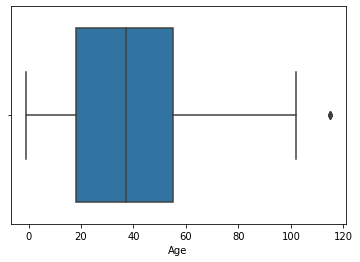

In [6]:
sns.boxplot(df.Age)
plt.show()

The output shows that there are indeed outliers after 100 but shows none below 0, to confirm this for the -1 in the age entry field, records can be brought up for fuurther examination.

In [7]:
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


The above output shows that there's only one record with this type of data, indicating that this is not normal for this dataset and could be an error. Furthermore, ages are not typically represented in negatives. 

In [8]:
df[df.Age > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762950e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196320e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196320e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196320e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196320e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342840e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482350e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


With some of these entries having the same PatientID, and the data already visually represented on the box plot as outliers, it is very possible that this information is inaccurate and best to avoid the outliers effect by excluding them along with the -1 aged patient from the data set.  To do this, the outliers will be trimmed in the following cell and visually represented in a box plot again to confirm.

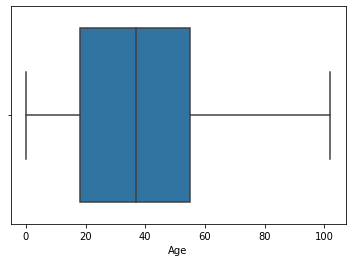

In [9]:
df = df[(df.Age > -1) & (df.Age < 115)]
sns.boxplot(df.Age)
plt.show()


The outliers have been trimmed and are no longer present as seen in the box plot.

Some of the columns are not useful for the analysis or to make any predictions, hence they will be dropped using the PandaDatafame.drop()functiom. the columns to be dropped are: 'patientID' and 'AppointmentID'.

In [10]:
df.drop (['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From the source data, the last column-'No-show says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. This can be a bit confusing and to convert it to a more readable form, the column values will be reversed from No to TRUE and Yes to FALSE and the column renamed from No.show to Showed_up.

In [11]:
df = pd.read_csv('Medical_appointments.csv')
df['No-show'] = df['No-show'].map({'Yes': False, 'No': True})

In [12]:
df.drop (['PatientId', 'AppointmentID'], axis=1, inplace=True)
df_Showedup = df.rename(columns = {'No-show':'Showedup'}, inplace=True)
df_Showedup
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showedup
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,True


# Exploratory Data Analysis

# Research Questions

1. How many patients showed up for tthe medical aappointments in comparison to the number of those who did not show up?

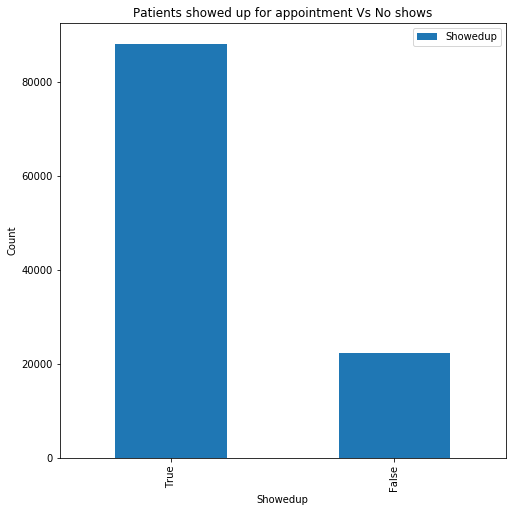

In [13]:
df.Showedup.value_counts().plot(kind='bar',figsize=(8,8))
plt.legend();
plt.xlabel('Showedup');
plt.ylabel('Count');
plt.title('Patients showed up for appointment Vs No shows');
plt.show();

This bar chart above showed that there are more people who showed up for appointments in comparison to those who didn’t show.

2. Is there a relationship between age and showing up for medical appointments? 

In [14]:
Showedup = df.Showedup == True
not_show = df.Showedup == False

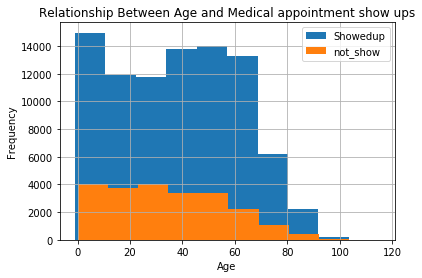

In [15]:
df.Age[Showedup].hist(label='Showedup');
df.Age[not_show].hist(label='not_show');
plt.legend();
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.title('Relationship Between Age and Medical appointment show ups');
plt.show();

The histogram showed that there is a great variation between age and the number of appointments. The maximum number of kept appointments ('Showed up') are for babies. A drop is observed and then a  There is a drop and then a spike as it approaches the age of 40. 
Finally, as the age progresses, it becomes noticeable that less and less people set up appointments. Therefore,age might have an effect the showedup variable i.e. patients showing up for their appointments.Interestingly, this observation is also true for the 'not_show' variable i.e the patients who did not show up to their appointments, except that the peal around age 60 is much smaller for the 'not_how' than it is for the 'showed up'. 
A further investigation into their averages could tell if there's a difference between the average age of the patients who kept teir appointments and those who did not. 

In [16]:
df.Age[Showedup].mean()

37.790064393252315

In [17]:
df.Age[not_show].mean()

34.31766656212196

The average age of not_show (M=34.32) was lower than those than showed up (M=37.79) by 3.47 years.

Do patients who receive SMS notifications show up more for their appointments?

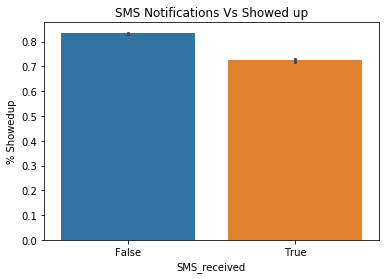

In [18]:
truefalse = {1:'True', 0:'False'}
ax = sns.barplot(x=df.SMS_received.map(truefalse), y=df.Showedup)
ax.set_ylabel('% Showedup')
plt.title('SMS Notifications Vs Showed up')
plt.show()

In [19]:
df.SMS_received.mean()

0.32102563174608917

As shown in the barchart above, the percentage of patients that did not show up for their appointment is slightly higher when SMS notifications were received, with only about 32% of the appointments receiving SMS notifications

Is there any relationship between the gender distribution of the patients and their show ups to medical appointments? 

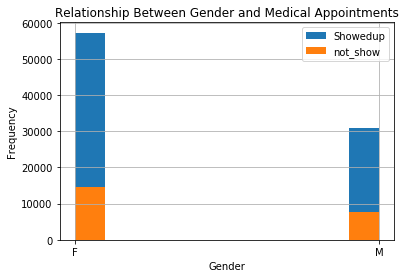

In [20]:
df.Gender[Showedup].hist(label='Showedup');
df.Gender[not_show].hist(label='not_show');
plt.legend();
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.title('Relationship Between Gender and Medical Appointments');
plt.show();

The histogram above showed that wommen showed up more for their appointments than men. However, could this be because there are generally more women than and men in the dataset. Further investigation to check the gender distribution will confirm this. 

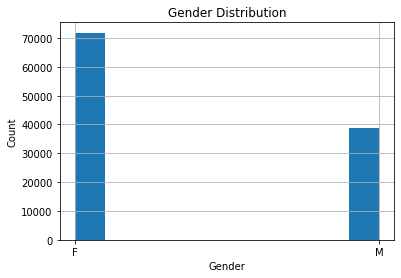

In [21]:
df.Gender.hist();
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('Gender Distribution');
plt.show();

In [22]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

The output above actually confirms that there are more females who have set up appointments compared to males.

5. Do Scholarship recipients show up more for their medical appointments?

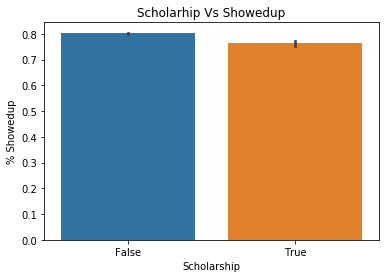

In [23]:
truefalse = {1:'True', 0:'False'}
ax = sns.barplot(x=df.Scholarship.map(truefalse), y=df.Showedup)
ax.set_ylabel('% Showedup')
plt.title('Scholarhip Vs Showedup')
plt.show()

The plot above revealed that the pecentage of showed ups and noshows almost remained constant whether the patients received scholarships or not.

# Conclusion

This data analysis showed that several variables were associated with Showedups, there was a small difference in the average age between patients who missed their appointments and those who did not. Also, more women were seen to seen how up for their appointments than men, however the dataset generally contained less men than women. 
On the other hand, the relationship between scholarships and Showedups was slightly different with the pecentage of showed ups and noshows remaining almost constant whether the patients received scholarships or not. 
However, the relationship between SMS_received and Showedups was a bit surprising, as it is a bit different from what was expected because the analysis revealed the percentage of patients that did not show up for their appointment was slightly higher when SMS notifications were received.

It is not enough to make definitive statements that certain variables like SMS notifications resulted in fewer show ups, because correlation does not imply causation. A limitation of this analysis was that there was not enough background information; such that other factors could have played a role in affecting the relationship between the SMS_received and Showedups as seen in the data analysis. The patients who have missed earlier appointments could have been persuaded to enroll in SMS notifications meaning that those who were receiving SMSes were the ones having issues making their appointments.

Also, the data showed the more women showed up for their appointments than men, further investigations showed that there were fewer men than women in the data set. however, more information is till needed to check if the difference between the men and womeb in the dataset is statistically significant.